In [1]:
#M Yusril Fauzan Hrp
#1103204015

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
dataset = "CarPrice_Assignment.csv"
df = pd.read_csv(dataset)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


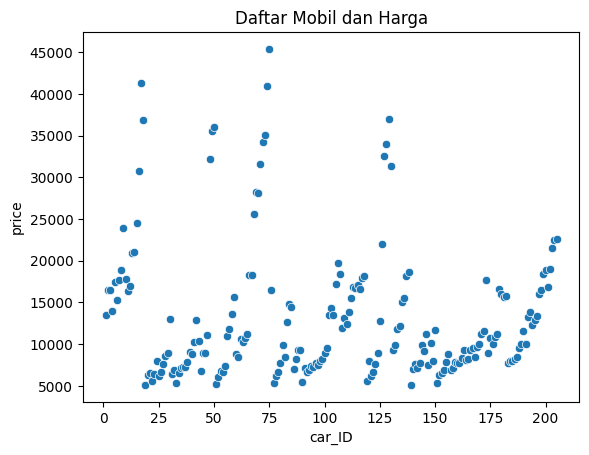

In [7]:
# Membuat scatter plot
sns.scatterplot(data = df, x = "car_ID", y = "price")

# Memberikan judul dan label
plt.title("Daftar Mobil dan Harga")
plt.xlabel("car_ID")
plt.ylabel("price")

# Menampilkan plot
plt.show()

In [8]:
# Kolom label y adalah 'price'
y = df['price']

# Kolom fitur x adalah 'car_ID'
x = df['car_ID']

In [9]:
x = np.array(x).reshape(-1, 1) # Mengubah x menjadi matriks 2D dengan satu kolom
y = np.array(y) # Membuat y dari data label (target)

Degree 1: MSE = 62754575.56
Degree 2: MSE = 62357471.91
Degree 3: MSE = 61956096.05
Degree 4: MSE = 57681601.42
Degree 5: MSE = 57679250.55
Degree 6: MSE = 57526447.74
Degree 7: MSE = 57167110.86
Degree 8: MSE = 58811177.90
Degree 9: MSE = 59032130.84
Degree 10: MSE = 59033959.60
Degree 11: MSE = 58781806.08
Degree 12: MSE = 58939597.91


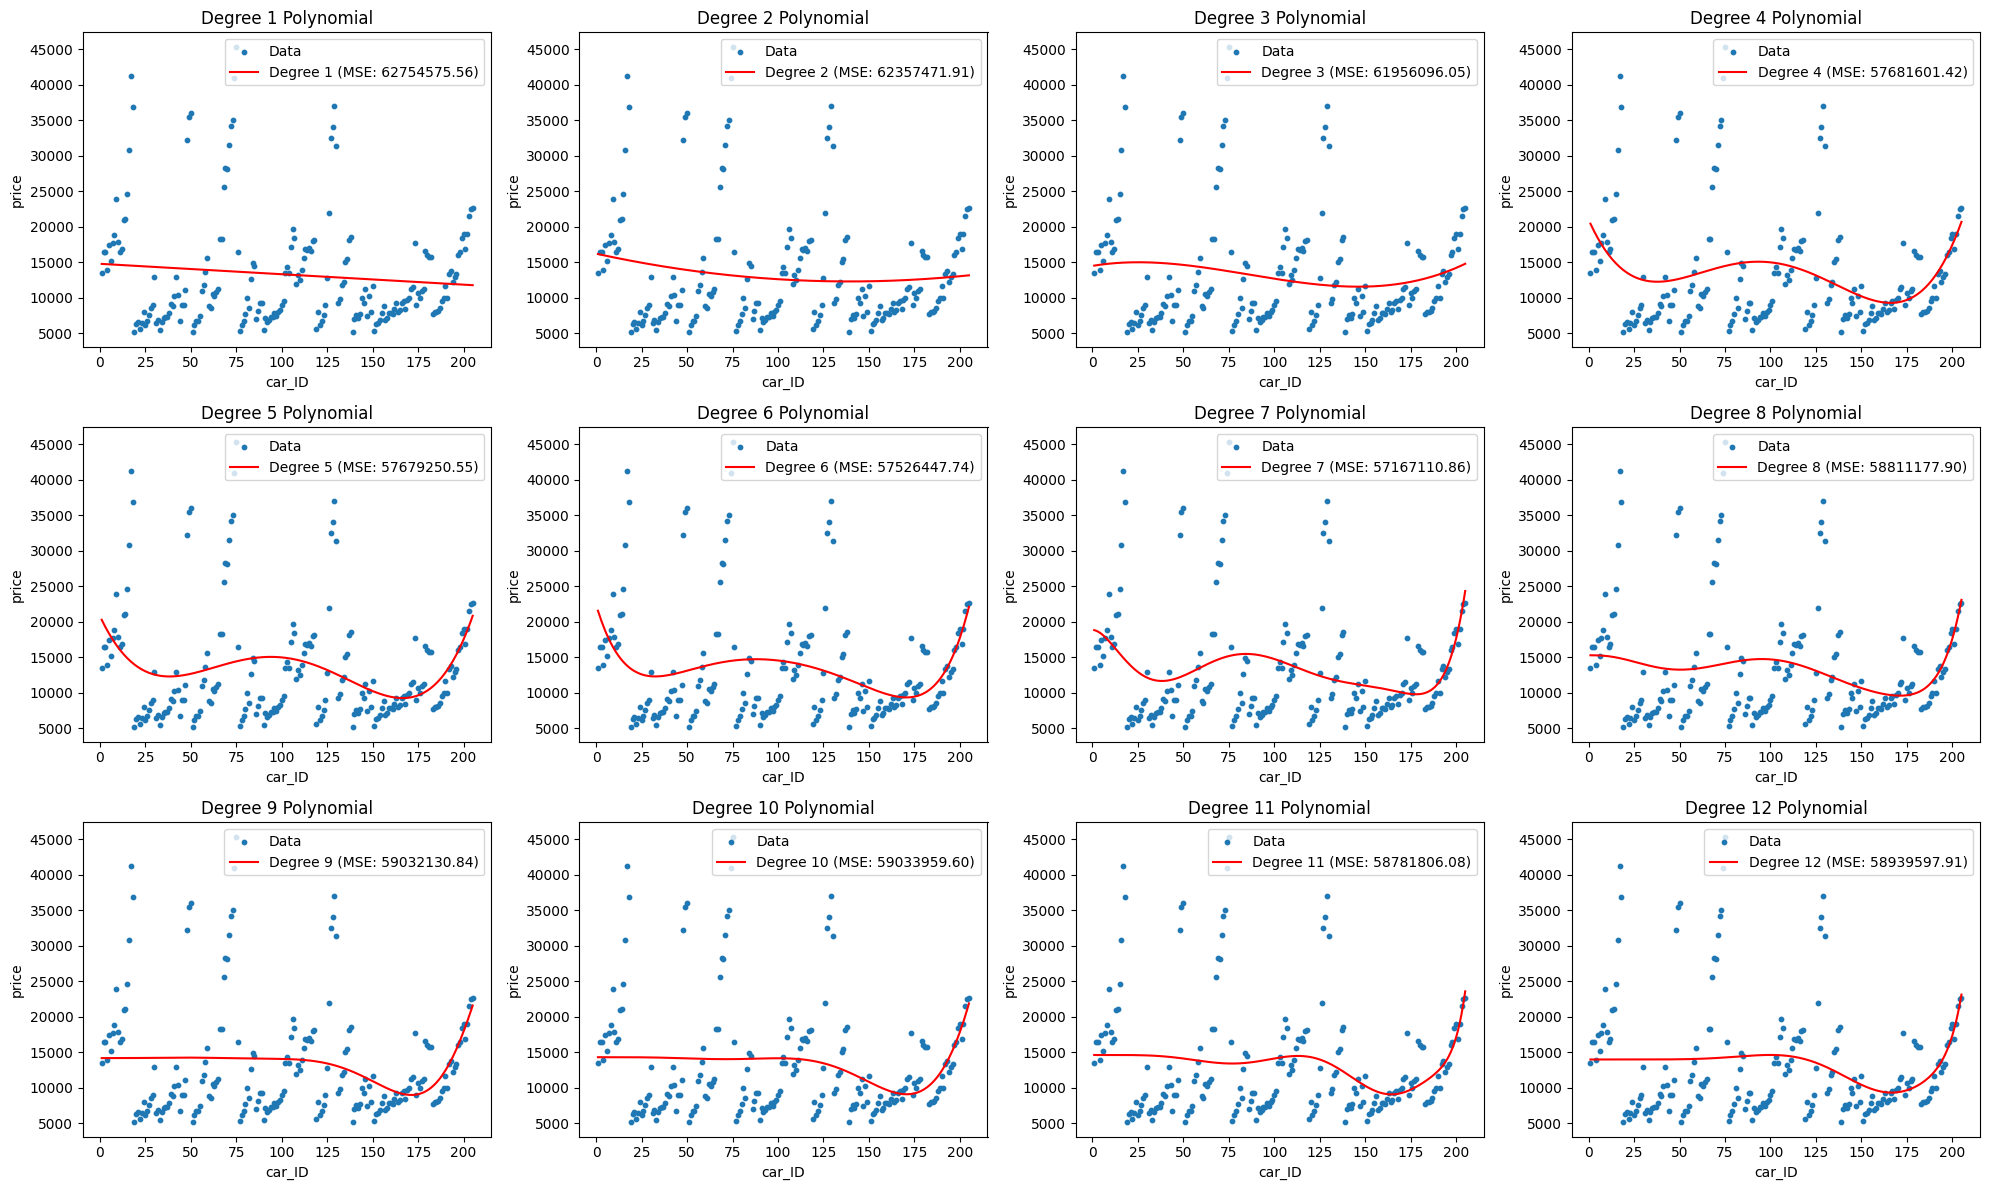

In [11]:
degrees = list(range(1, 13)) # Membuat daftar derajat polinomial yang akan diuji dari 1 hingga 12
mse_values = [] # Membuat list untuk menyimpan nilai MSE
plt.figure(figsize=(20, 12)) # Membuat plot terpisah untuk masing-masing derajat polinomial

for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=degree) # Membuat objek PolynomialFeatures
    x_poly = polynomial_features.fit_transform(x) # Transformasi data menjadi polinomial
    model = LinearRegression() # Membuat model regresi linier dengan data polinomial
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly) # Prediksi dengan model yang telah dibuat
    mse = mean_squared_error(y, y_pred) # Menghitung Mean Squared Error (MSE)
    mse_values.append(mse)

    # Plot hasil regresi polinomial
    plt.subplot(3, 4, i + 1)
    plt.scatter(x, y, s=10, label='Data')
    plt.plot(x, y_pred, color='r', label=f'Degree {degree} (MSE: {mse:.2f})')
    plt.title(f'Degree {degree} Polynomial')
    plt.xlabel('car_ID')
    plt.ylabel('price')
    plt.legend()

# Mencetak MSE untuk setiap derajat polinomial
for degree, mse in zip(degrees, mse_values):
    print(f'Degree {degree}: MSE = {mse:.2f}')

plt.tight_layout()
plt.show()
